
## *SECTION 1 / PROJECT*

---

# 🎮AI_18_남자인

목표 : 다음분기에 어떤 게임을 설계해야할까

## ❗반드시 들어가야 하는 내용

1. 지역에 따라서 선호하는 게임 장르가 다를까 
  - 지역은 어떻게 구분했나요?
  - 지역별로 선호하는 게임의 장르를 파악했나요?
  - 지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했나요?
2. 연도별 게임의 트렌드가 있을까
  - 트렌드는 어떤 것을 기준으로 파악했나요?
  - 연도별로 트렌드가 존재하나요?
  - 왜 존재한다/존재하지 않는다고 생각했나요?
3. 인기가 많은 게임에 대한 분석 및 시각화 프로세스
  - 인기가 많다는 것을 어떻게 정의했나요?
  - 해당 게임이 왜 인기가 많다고 생각했나요?
  - 시각화를 통해 무엇을 나타내고자 하는지를 고려했나요?
  - 해당 분석을 통해 어떤 인사이트를 도출할 수 있나요?
4. 다음 분기에 어떤 게임을 설계해야 하는지

 기타 고려사항 : 다음 분기, 회사의 규모 등

### 💯추가 조건
> - 디테일한 시점 및 목표 설정이 문제 정의 과정에서 제시되었는가?
- 도메인 지식을 활용하여 비지니스 인사이트를 도출하였는가?
- 제공된 데이터셋 외에 추가 데이터를 사용하였는가?
- 통계적 기법을 활용한 가설 검정을 진행하였는가?
- 완성도 높은 시각화를 보여주었는가?
- 가독성, 목적성이 잘 드러나는 시각화

###문제 해결 순서
1. 품질적 문제 확인 및 정제(결측, 중복, 이상치 제거)
2. 구조적 문제 확인
3. 지역별 선호 게임
4. 연도별 트렌드 게임
5. 인기많은 게임에 대한 분석
6. 다음 분기 게임 설계

In [2]:
#라이브러리 설정
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 파일 업로드
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [67]:
# 데이터 불러오기
df = pd.read_csv('vgames2.csv')

In [5]:
# 데이터 훑어보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [6]:
# 연도, 장르, 퍼블리셔 null 값 확인
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [7]:
#결측치 포함 행 개수 확인
df[df['Year'or'Genre'or'Publisher'].isnull() == True]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,32,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
109,110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,274,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
358,359,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
430,431,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03
...,...,...,...,...,...,...,...,...,...,...
16240,16241,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0,0,0
16275,16276,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0M,0.03
16278,16279,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K
16425,16426,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0


발행연도, 장르, 게임사에서 결측치가 발견되었음.<br>
*총 16,598 개 중 271 개*<br>
결측치 제거시 다른 데이터 계산에 큰 문제가 발생할 것으로 보이지는 
않으므로, 결측치는 제거하도록 하겠음.

In [8]:
df_clean = df.copy()

In [9]:
# 1.필요없는 컬럼 제거 (Unnamed : 0)
df_clean.drop(columns = 'Unnamed: 0', inplace = True)
df_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [10]:
# 2. 결측치 제거
df_clean.dropna(inplace = True)

In [11]:
# 3.중복치 확인 : 없음
df_clean[df_clean.duplicated(keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [12]:
df_clean.shape

(16241, 9)

In [13]:
#실수를 상징하는 .0을 제거하고
df_clean.Year = df_clean.Year.astype(str).str[:-2]

In [14]:
# int로 재 변환
df_clean.Year = df_clean.Year.astype(int)

###연도별 이상치의 경우, sales 규모를 보고 판단할 예정

In [15]:
import re

In [16]:
def has_alphabet(inputString):
  return bool(re.search('[A-Z]', inputString))
#  return bool(re.search('[_!\D+]', inputString))

In [17]:
# 연도 데이터 타입 변환
#df_clean = pd.to_numeric(df_clean.str.replace('.',''))
#Year = pd.to_numeric(Year.str.replace(','or' ', ''))

In [18]:
# M 과 K를 구분해서 숫자로 치환해주는 함수 적용
def convert(data):
  data = data.replace('M' ,'')
  data = data.replace('K' ,'')
  return data

In [19]:
df_clean.NA_Sales = df_clean.NA_Sales.apply(convert)
df_clean.EU_Sales = df_clean.EU_Sales.apply(convert)
df_clean.JP_Sales = df_clean.JP_Sales.apply(convert)
df_clean.Other_Sales = df_clean.Other_Sales.apply(convert)

In [20]:
def change_M(data):
  if '.' in data:
    data = data.replace('.','')
    data = data + '0'
  else:
    data = data    
  return data

In [21]:
df_clean.NA_Sales = df_clean.NA_Sales.apply(change_M)
df_clean.EU_Sales = df_clean.EU_Sales.apply(change_M)
df_clean.JP_Sales = df_clean.JP_Sales.apply(change_M)
df_clean.Other_Sales = df_clean.Other_Sales.apply(change_M)

In [22]:
# int로 재 변환
df_clean.NA_Sales = df_clean.NA_Sales.astype(int)
df_clean.EU_Sales = df_clean.EU_Sales.astype(int)
df_clean.JP_Sales = df_clean.JP_Sales.astype(int)
df_clean.Other_Sales = df_clean.Other_Sales.astype(int)

In [23]:
# million 단위로 통일해주기
df_clean.NA_Sales = df_clean.NA_Sales/1000
df_clean.EU_Sales = df_clean.EU_Sales/1000
df_clean.JP_Sales = df_clean.JP_Sales/1000
df_clean.Other_Sales = df_clean.Other_Sales/1000

In [24]:
df_clean.loc[:,'Total_Sales'] = df_clean.loc[:, 'NA_Sales':'Other_Sales'].sum(axis=1)

In [25]:
#인당 판매량
df_clean.loc[:,'Na_Sales/p'] = df_clean.loc[:, 'NA_Sales']/350
df_clean.loc[:,'EU_Sales/p'] = df_clean.loc[:, 'EU_Sales']/450
df_clean.loc[:,'JP_Sales/p'] = df_clean.loc[:, 'JP_Sales']/350
df_clean.loc[:,'Other_Sales/P'] = df_clean.loc[:, 'Other_Sales']/6480

In [26]:
#인당 판매량 합계
df_clean.loc[:,'P_I'] = df_clean.loc[:, 'Na_Sales/p':'Other_Sales/P'].sum(axis=1)*1000

###연도별 이상치 확인 및 데이터 정제제

In [27]:
#연도별 이상치 확인인
wierd_year = df_clean.query('Year<1950')
wierd_year.shape[0]

100

In [28]:
import matplotlib.pyplot as plt

(array([93.,  5.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([1.0000e-02, 1.5410e+00, 3.0720e+00, 4.6030e+00, 6.1340e+00,
        7.6650e+00, 9.1960e+00, 1.0727e+01, 1.2258e+01, 1.3789e+01,
        1.5320e+01]),
 <BarContainer object of 10 artists>)

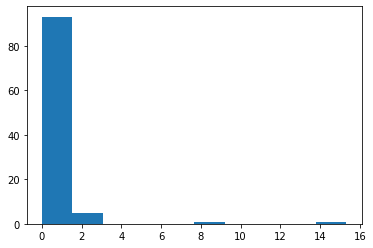

In [29]:
plt.hist(wierd_year.Total_Sales)

(0.0, 20.0)

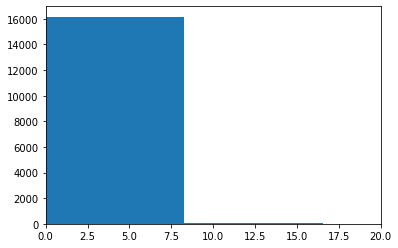

In [30]:
plt.hist(df_clean.Total_Sales)
plt.xlim(0,20)

### 16000개 데이터 중 year가 1900년대 이전으로 나오는 데이터는 100개이며, total sales 분포로도 삭제시 큰 영향을 미치지 않을 것으로 보이므로, 제거하겠음

In [31]:
A = df_clean[df_clean['Year'] < 1900].index

In [32]:
df_clean.drop(A, axis = 'index', inplace = True)

In [33]:
df_clean.shape

(16141, 15)

### 연도별 장르 Tottal sales 확인 후, 누락된 데이터 제거


In [34]:
df_clean.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales', 'Na_Sales/p',
       'EU_Sales/p', 'JP_Sales/p', 'Other_Sales/P', 'P_I'],
      dtype='object')

In [35]:
df_a = df_clean.groupby(['Year','Genre']).sum().sort_values('Year', ascending = True)

In [36]:
df_a

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales  \
Year Genre                                                                  
1980 Action           0.320      0.02      0.00         0.00        0.340   
     Fighting         0.720      0.04      0.00         0.01        0.770   
     Misc             2.530      0.15      0.00         0.02        2.700   
     Shooter          2.564      0.43      0.00         0.08        3.074   
1981 Simulation       0.420      0.02      0.00         0.00        0.440   
...                     ...       ...       ...          ...          ...   
2016 Action           5.780      5.91      5.50         1.74       18.930   
     Racing           0.330      0.92      0.01         0.18        1.440   
2017 Role-Playing     0.000      0.00      0.04         0.00        0.040   
     Action           0.000      0.00      0.01         0.00        0.010   
2020 Simulation       0.270      0.00      0.00         0.02        0.290   

                   Na_Sales/p  EU_Sales/p  JP_Sales/p  Other_Sales/P  \
Year Genre                                                             
1980 Action          0.000914    0.000044    0.000000       0.000000   
     Fighting        0.002057    0.000089    0.000000       0.000002   
     Misc            0.007229    0.000333    0.000000       0.000003   
     Shooter         0.007326    0.000956    0.000000       0.000012   
1981 Simulation      0.001200    0.000044    0.000000       0.000000   
...                       ...         ...         ...            ...   
2016 Action          0.016514    0.013133    0.015714       0.000269   
     Racing          0.000943    0.002044    0.000029       0.000028   
2017 Role-Playing    0.000000    0.000000    0.000114       0.000000   
     Action          0.000000    0.000000    0.000029       0.000000   
2020 Simulation      0.000771    0.000000    0.000000       0.000003   

                         P_I  
Year Genre                    
1980 Action         0.958730  
     Fighting       2.147575  
     Misc           7.564991  
     Shooter        8.293616  
1981 Simulation     1.244444  
...                      ...  
2016 Action        45.630423  
     Racing         3.043651  
2017 Role-Playing   0.114286  
     Action         0.028571  
2020 Simulation     0.774515  

[388 rows x 10 columns]

In [37]:
df_at = pd.pivot_table(df_a, index = 'Genre', columns = 'Year', values = 'Total_Sales')

In [38]:
df_at

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Genre,,,,,,,,,,,,,,,,,,,,,
Action,0.340,14.16,5.78,2.86,1.13,3.52,13.740,0.57,1.74,4.650,...,121.921,106.07,103.47,112.05,117.74,87.58,64.420,18.93,0.01,NaN
Adventure,NaN,NaN,NaN,0.40,NaN,NaN,NaN,3.93,NaN,NaN,...,19.120,15.31,14.92,5.45,6.34,5.55,7.830,1.79,NaN,NaN
Fighting,0.770,NaN,NaN,NaN,NaN,1.05,NaN,5.42,NaN,NaN,...,30.020,12.72,20.76,8.45,6.67,14.69,6.331,3.67,NaN,NaN
Misc,2.700,NaN,0.87,2.14,1.45,NaN,NaN,NaN,NaN,1.280,...,69.880,86.15,51.72,21.28,25.20,23.10,10.430,1.00,NaN,NaN
Platform,NaN,6.11,4.58,6.30,0.69,43.08,5.910,1.74,27.10,20.030,...,36.180,30.36,27.40,16.38,23.02,8.69,5.780,1.99,NaN,NaN
Puzzle,NaN,2.16,9.95,0.78,2.06,2.85,NaN,NaN,5.58,14.692,...,17.840,10.57,4.73,1.29,0.91,1.50,0.690,NaN,NaN,NaN
Racing,NaN,0.48,0.58,NaN,5.95,NaN,1.960,NaN,2.05,NaN,...,32.290,33.13,33.87,13.17,11.04,16.17,7.560,1.44,NaN,NaN
Role-Playing,NaN,NaN,NaN,NaN,NaN,NaN,2.520,4.65,5.79,0.220,...,47.510,50.93,41.25,45.34,26.76,43.54,31.502,6.30,0.04,NaN
Shooter,3.074,10.02,3.81,0.49,31.10,1.00,1.811,0.69,0.51,0.830,...,65.870,75.56,93.80,67.61,60.48,56.63,64.140,12.53,NaN,NaN


In [39]:
df_atn = df_at.dropna(axis = 1)

In [40]:
df_atn

Year,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Genre,,,,,,,,,,,,,,,,,,,,,
Action,6.76,3.840,1.720,1.550,2.86,17.792,24.970,37.790,21.050,27.590,...,55.980,98.250,121.470,121.921,106.07,103.47,112.05,117.74,87.58,64.420
Adventure,2.24,12.240,0.070,3.740,0.62,3.180,4.880,8.041,7.160,2.600,...,10.580,22.082,22.521,19.120,15.31,14.92,5.45,6.34,5.55,7.830
Fighting,0.39,12.071,7.670,7.910,10.87,17.230,11.350,28.800,12.240,17.920,...,19.180,16.190,34.100,30.020,12.72,20.76,8.45,6.67,14.69,6.331
Misc,0.08,3.950,0.300,2.770,5.94,9.850,5.230,11.840,19.141,14.470,...,55.431,80.630,77.802,69.880,86.15,51.72,21.28,25.20,23.10,10.430
Platform,7.18,10.800,16.511,25.583,12.82,26.790,20.600,28.750,15.310,15.240,...,40.070,27.070,29.980,36.180,30.36,27.40,16.38,23.02,8.69,5.780
Puzzle,2.52,4.840,3.170,0.900,2.69,2.030,3.431,4.640,1.340,3.830,...,10.790,22.800,14.780,17.840,10.57,4.73,1.29,0.91,1.50,0.690
Racing,1.14,9.050,0.360,2.000,5.55,26.050,29.202,25.610,34.310,14.492,...,31.450,35.880,67.580,32.290,33.13,33.87,13.17,11.04,16.17,7.560
Role-Playing,3.26,6.860,5.590,6.230,11.93,42.541,21.460,27.730,31.049,23.460,...,49.000,38.550,56.810,47.510,50.93,41.25,45.34,26.76,43.54,31.502
Shooter,1.99,0.280,2.360,6.590,3.26,6.000,16.670,8.990,11.780,5.370,...,32.470,61.241,53.670,65.870,75.56,93.80,67.61,60.48,56.63,64.140


### 삭제된 연도를 중심으로 최종 데이터셋 정립
1991-2015 년도 데이터 설정


In [41]:
#1991- 2015년도 데이터로 정제
df_final = df_clean.query('1990 < Year< 2016').reset_index(drop=True)

In [42]:
df_final

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Na_Sales/p,EU_Sales/p,JP_Sales/p,Other_Sales/P,P_I
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,0.000114,0.000000,0.000000,0.000000,0.114286
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,0.000486,0.000000,0.000000,0.000002,0.487257
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,0.000000,0.000000,0.000057,0.000000,0.057143
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,0.000114,0.000000,0.000000,0.000000,0.114286
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,0.000343,0.000200,0.000000,0.000006,0.549030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15576,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,0.000429,0.000089,0.000000,0.000002,0.519004
15577,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,0.000029,0.000000,0.000000,0.000000,0.028571
15578,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,0.001257,0.000422,0.000086,0.000020,1.785141
15579,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38,0.000143,0.000111,0.000714,0.000005,0.972884


###heatmap 그려보기
Total score를 중심으로y축 연도 x축 장르

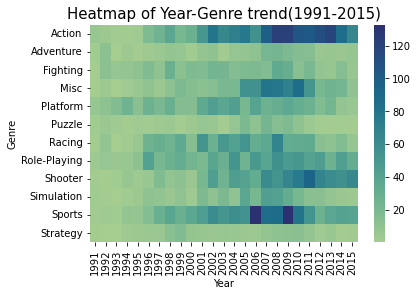

In [43]:
ax_h = ax = sns.heatmap(df_atn, cmap='crest')
plt.title('Heatmap of Year-Genre trend(1991-2015)', fontsize=15)
plt.show() 

In [44]:
#표준화시 필요한 라이브러리 불러오기
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
df_atns = scaler.fit_transform(df_atn)

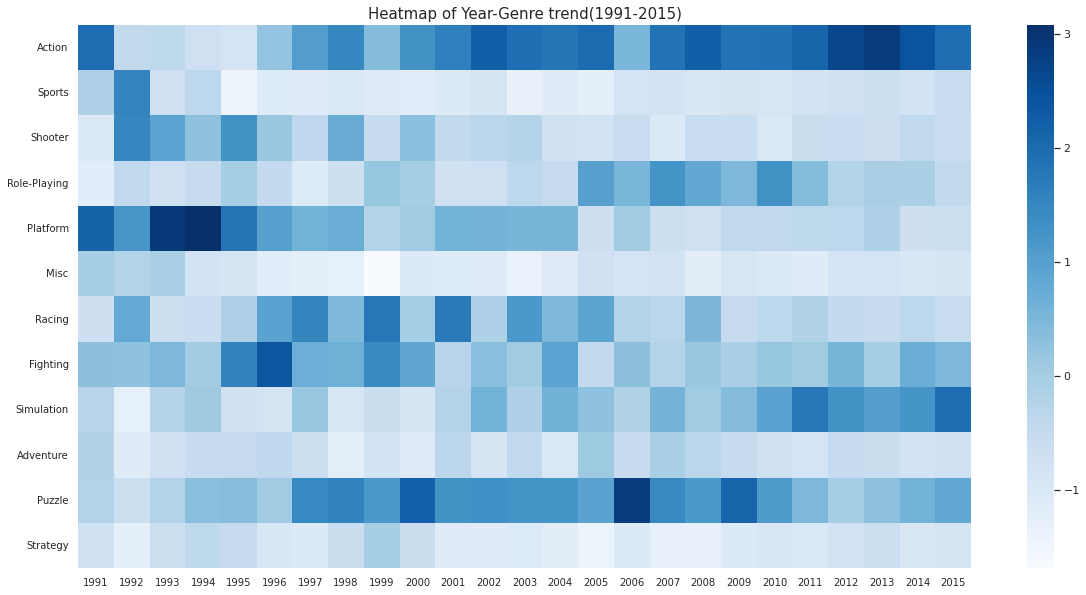

In [46]:
#표준화된 데이터로 그래프 그려보기기
sns.set(rc = {'figure.figsize':(20,10)})
ax_h = ax = sns.heatmap(df_atns, cmap='Blues') #annot=True)
plt.title('Heatmap of Year-Genre trend(1991-2015)', fontsize=15)
ax_h.set_xticklabels(range(1991,2016), fontsize=10)
ax_h.set_yticklabels(['Action','Sports', 'Shooter', 'Role-Playing', 'Platform', 'Misc', 'Racing', 'Fighting', 'Simulation', 'Adventure', 'Puzzle', 'Strategy'], rotation = 0, fontsize=10)
plt.show() 

###3. 지역별 선호 게임 추출
### 장르별, 나라별 데이터 추출
### x축_국가, y축_판매량, 누적 그래프

In [47]:
df_clean.Genre.unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

In [48]:
df_Genre = df_final.groupby('Genre').sum().drop('Year', axis=1).sort_values('Total_Sales', ascending = False)

In [49]:
df_Genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Na_Sales/p,EU_Sales/p,JP_Sales/p,Other_Sales/P,P_I
Genre,,,,,,,,,,
Action,722.762,458.402,131.990,166.481,1479.635,2.065034,1.018671,0.377114,0.025692,3486.511195
Sports,600.082,331.390,104.320,124.730,1160.522,1.714520,0.736422,0.298057,0.019248,2768.247822
Shooter,478.522,270.630,28.820,93.120,871.092,1.367206,0.601400,0.082343,0.014370,2065.318942
Role-Playing,282.230,158.442,287.400,48.231,776.303,0.806371,0.352093,0.821143,0.007443,1987.050675
Misc,362.505,181.371,87.912,67.620,699.408,1.035729,0.403047,0.251177,0.010435,1700.387566
Racing,322.944,212.072,47.990,72.020,655.026,0.922697,0.471271,0.137114,0.011114,1542.196737
Platform,325.371,166.360,71.263,41.650,604.644,0.929631,0.369689,0.203609,0.006427,1509.356358
Fighting,199.132,88.790,72.300,33.100,393.322,0.568949,0.197311,0.206571,0.005108,977.939136
Simulation,165.490,94.152,59.710,29.110,348.462,0.472829,0.209227,0.170600,0.004492,857.147522


In [50]:
df_Genre_p = df_Genre.drop(['Total_Sales', 'Na_Sales/p', 'EU_Sales/p','JP_Sales/p','Other_Sales/P','P_I'], axis=1).T

In [51]:
df_Genre_p

Genre,Action,Sports,Shooter,Role-Playing,Misc,Racing,Platform,Fighting,Simulation,Adventure,Strategy,Puzzle
NA_Sales,722.762,600.082,478.522,282.230,362.505,322.944,325.371,199.132,165.490,91.472,61.41,66.800
EU_Sales,458.402,331.390,270.630,158.442,181.371,212.072,166.360,88.790,94.152,57.532,43.39,42.630
JP_Sales,131.990,104.320,28.820,287.400,87.912,47.990,71.263,72.300,59.710,47.070,41.96,35.931
Other_Sales,166.481,124.730,93.120,48.231,67.620,72.020,41.650,33.100,29.110,15.100,10.80,10.920


In [52]:
import matplotlib
matplotlib.style.use('default')
import seaborn as sns

'\ndf_Genre_p.loc[:,[\'Action\',\'Sports\', \'Shooter\', \'Role-Playing\', \'Platform\', \'Misc\', \'Racing\', \'Fighting\', \'Simulation\', \'Adventure\', \'Puzzle\', \'Strategy\']].plot.bar(stacked=True, figsize=(10,7))\nplt.xlabel("Nations")\nplt.ylabel("Sales(million)")\nplt.title(\'Sales for Nations by Genre\')\n'

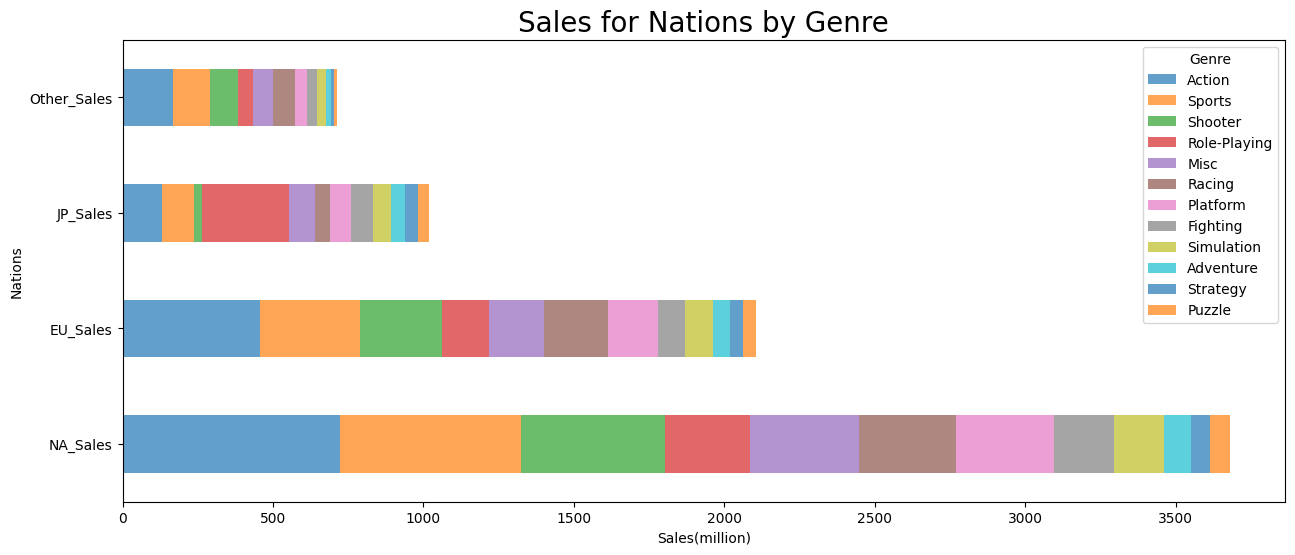

In [53]:
df_Genre_p.plot(kind = 'barh', figsize=(15, 6), stacked=True, alpha=0.7)
plt.xlabel("Sales(million)")
plt.ylabel("Nations")
plt.title('Sales for Nations by Genre', size = 20)
'''
df_Genre_p.loc[:,['Action','Sports', 'Shooter', 'Role-Playing', 'Platform', 'Misc', 'Racing', 'Fighting', 'Simulation', 'Adventure', 'Puzzle', 'Strategy']].plot.bar(stacked=True, figsize=(10,7))
plt.xlabel("Nations")
plt.ylabel("Sales(million)")
plt.title('Sales for Nations by Genre')
'''

In [54]:
# 장르별 판매량을 비율로 변환 (국가별)
df_Genre_pp = df_Genre_p.div(df_Genre_p.sum(axis=1), axis=0)*100

In [55]:
df_Genre_pp = round(df_Genre_pp, 2)

In [56]:
df_Genre_pp

Genre,Action,Sports,Shooter,Role-Playing,Misc,Racing,Platform,Fighting,Simulation,Adventure,Strategy,Puzzle
NA_Sales,19.65,16.31,13.01,7.67,9.85,8.78,8.84,5.41,4.50,2.49,1.67,1.82
EU_Sales,21.78,15.74,12.86,7.53,8.62,10.07,7.90,4.22,4.47,2.73,2.06,2.03
JP_Sales,12.98,10.26,2.83,28.27,8.65,4.72,7.01,7.11,5.87,4.63,4.13,3.53
Other_Sales,23.35,17.50,13.06,6.77,9.49,10.10,5.84,4.64,4.08,2.12,1.51,1.53


Text(0.5, 1.0, '1991-2015 Total Sales for Nations by Genre (%)')

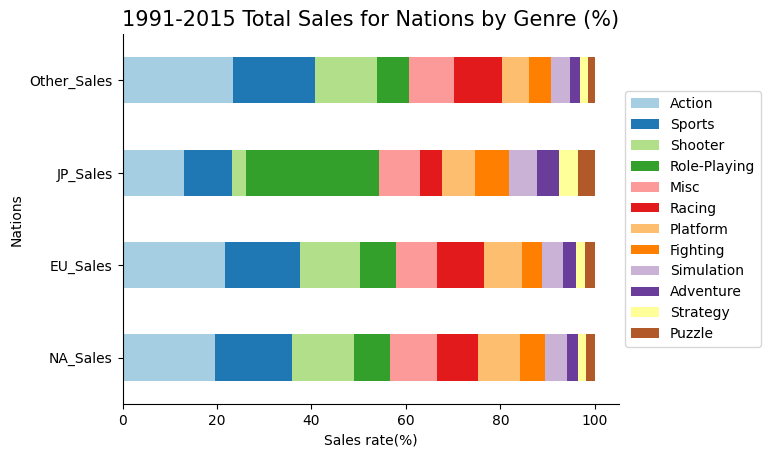

In [57]:
from matplotlib import figure
ax = df_Genre_pp.plot(kind="barh", stacked=True, colormap='Paired')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Sales rate(%)")
plt.ylabel("Nations")
plt.title('1991-2015 Total Sales for Nations by Genre (%)', fontsize = '15')
#데이터에.. 숫자를 표시하고 싶었으나.. 시간적 한계로 포기했습니다..
#def add_value_label(x_list,y_list):
#for i in range(1, len(df_Genre_pp)+1):
#  plt.annotate(df_Genre_pp[i-1],(i,df_Genre_pp[i-1]/2),ha="center")

In [58]:
'''
Genre = ['Action','Sports', 'Shooter', 'Role-Playing', 'Platform', 'Misc', 'Racing', 'Fighting', 'Simulation', 'Adventure', 'Puzzle', 'Strategy']
Nations = ['Na','EU','JP','Other']
fig, ax = plt.subplots()
# 피규어 크기
fig.set_size_inches(10, 15)
# 그래프 뒤에 그리드 그리기
ax.set_axisbelow(True)
# y 축만 그리드 그리기
ax.grid(True, axis='y')
# bar 그리기
ax.bar(Nations, df_Genre_pp['Action'], label = 'Action')
ax.bar(Nations, df_Genre_pp['Sports'], bottom = df_Genre_pp['Action'], label = 'Sports')
ax.bar(Nations, df_Genre_pp['Shooter'], bottom = df_Genre_pp['Sports'], label = 'Shooter')
ax.bar(Nations, df_Genre_pp['Role-Playing'], bottom = df_Genre_pp['Shooter'], label = 'Role-Playing')
#ax.bar(Nations, df_Genre_pp['Platform'], bottom = df_Genre_pp['Role-Playing'], label = 'Platform')
#ax.bar(Nations, df_Genre_pp['Misc'], bottom = df_Genre_pp['Platform'], label = 'Misc')
#ax.bar(Nations, df_Genre_pp['Racing'], bottom = df_Genre_pp['Misc'], label = 'Racing')
#ax.bar(Nations, df_Genre_pp['Fighting'], bottom = df_Genre_pp['Racing'], label = 'Fighting')
#ax.bar(Nations, df_Genre_pp['Simulation'], bottom = df_Genre_pp['Fighting'], label = 'Simulation')
#ax.bar(Nations, df_Genre_pp['Adventure'], bottom = df_Genre_pp['Simulation'], label = 'Adventure')
#ax.bar(Nations, df_Genre_pp['Puzzle'], bottom = df_Genre_pp['Adventure'], label = 'Puzzle')
#ax.bar(Nations, df_Genre_pp['Strategy'], bottom = df_Genre_pp['Puzzle'], label = 'Strategy')
# 라벨 설정
ax.set_xlabel('Nations', fontsize = 25)
ax.set_ylabel('Sales rate(%)', fontsize = 25)
# tick 설정
ax.tick_params(axis = 'x', labelsize = 25)
ax.tick_params(axis = 'y', labelsize = 25)
# 범례 표시
ax.legend(fontsize = 10)

# 텍스트 지정
for i in range(len(Nations)):
    ax.text(Nations[i], df_Genre_pp['Action'][i] / 2, str(df_Genre_pp['Action'][i]) + '%', fontsize = 20, horizontalalignment='center', color = 'w')
    ax.text(Nations[i], (df_Genre_pp['Action'][i] + df_Genre_pp['Action'][i] + df_Genre_pp['Sports'][i])/ 2, str(df_Genre_pp['Sports'][i]) + '%', fontsize = 20, horizontalalignment='center', color = 'w')
    ax.text(Nations[i], (df_Genre_pp['Sports'][i] + df_Genre_pp['Sports'][i] + df_Genre_pp['Shooter'][i])/ 2, str(df_Genre_pp['Shooter'][i]) + '%', fontsize = 20, horizontalalignment='center', color = 'w')
    ax.text(Nations[i], (df_Genre_pp['Shooter'][i] + df_Genre_pp['Shooter'][i] + df_Genre_pp['Role-Playing'][i])/ 2, str(df_Genre_pp['Role-Playing'][i]) + '%', fontsize = 20, horizontalalignment='center', color = 'w')
    ax.text(Nations[i], (df_Genre_pp['Role-Playing'][i] + df_Genre_pp['Role-Playing'][i] + df_Genre_pp['Platform'][i])/ 2, str(df_Genre_pp['Platform'][i]) + '%', fontsize = 20, horizontalalignment='center', color = 'w')
    ax.text(Nations[i], (df_Genre_pp['Platform'][i] + df_Genre_pp['Platform'][i] + df_Genre_pp['Misc'][i])/ 2, str(df_Genre_pp['Misc'][i]) + '%', fontsize = 20, horizontalalignment='center', color = 'w')
    ax.text(Nations[i], (df_Genre_pp['Misc'][i] + df_Genre_pp['Misc'][i] + df_Genre_pp['Racing'][i])/ 2, str(df_Genre_pp['Racing'][i]) + '%', fontsize = 20, horizontalalignment='center', color = 'w')
    ax.text(Nations[i], (df_Genre_pp['Racing'][i] + df_Genre_pp['Racing'][i] + df_Genre_pp['Fighting'][i])/ 2, str(df_Genre_pp['Fighting'][i]) + '%', fontsize = 20, horizontalalignment='center', color = 'w')
    ax.text(Nations[i], (df_Genre_pp['Fighting'][i] + df_Genre_pp['Fighting'][i] + df_Genre_pp['Simulation'][i])/ 2, str(df_Genre_pp['Simulation'][i]) + '%', fontsize = 20, horizontalalignment='center', color = 'w')
    ax.text(Nations[i], (df_Genre_pp['Simulation'][i] + df_Genre_pp['Simulation'][i] + df_Genre_pp['Adventure'][i])/ 2, str(df_Genre_pp['Adventure'][i]) + '%', fontsize = 20, horizontalalignment='center', color = 'w')
    ax.text(Nations[i], (df_Genre_pp['Adventure'][i] + df_Genre_pp['Adventure'][i] + df_Genre_pp['Puzzle'][i])/ 2, str(df_Genre_pp['Puzzle'][i]) + '%', fontsize = 20, horizontalalignment='center', color = 'w')
    ax.text(Nations[i], (df_Genre_pp['Puzzle'][i] + df_Genre_pp['Puzzle'][i] + df_Genre_pp['Strategy'][i])/ 2, str(df_Genre_pp['Strategy'][i]) + '%', fontsize = 20, horizontalalignment='center', color = 'w')
'''

"\nGenre = ['Action','Sports', 'Shooter', 'Role-Playing', 'Platform', 'Misc', 'Racing', 'Fighting', 'Simulation', 'Adventure', 'Puzzle', 'Strategy']\nNations = ['Na','EU','JP','Other']\nfig, ax = plt.subplots()\n# 피규어 크기\nfig.set_size_inches(10, 15)\n# 그래프 뒤에 그리드 그리기\nax.set_axisbelow(True)\n# y 축만 그리드 그리기\nax.grid(True, axis='y')\n# bar 그리기\nax.bar(Nations, df_Genre_pp['Action'], label = 'Action')\nax.bar(Nations, df_Genre_pp['Sports'], bottom = df_Genre_pp['Action'], label = 'Sports')\nax.bar(Nations, df_Genre_pp['Shooter'], bottom = df_Genre_pp['Sports'], label = 'Shooter')\nax.bar(Nations, df_Genre_pp['Role-Playing'], bottom = df_Genre_pp['Shooter'], label = 'Role-Playing')\n#ax.bar(Nations, df_Genre_pp['Platform'], bottom = df_Genre_pp['Role-Playing'], label = 'Platform')\n#ax.bar(Nations, df_Genre_pp['Misc'], bottom = df_Genre_pp['Platform'], label = 'Misc')\n#ax.bar(Nations, df_Genre_pp['Racing'], bottom = df_Genre_pp['Misc'], label = 'Racing')\n#ax.bar(Nations, df_Genre_pp['Fig

### 지역별로 선호하는 게임의 장르를 파악했나요?
####지역별 게임 장르 총 판매량 비율

  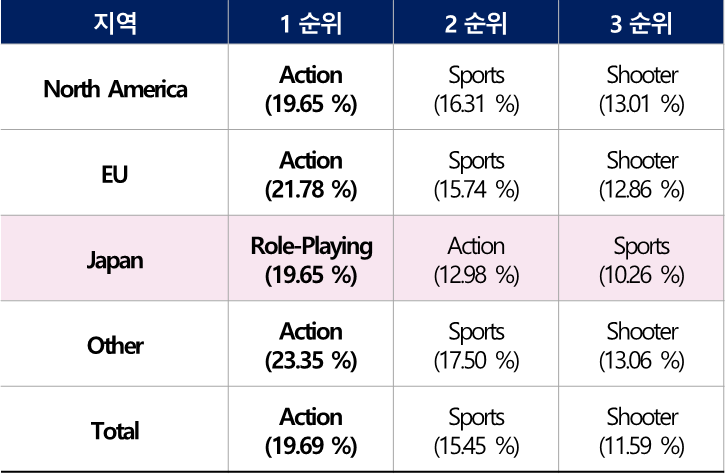

###지역별로 선호하는 게임이 같다고 가설 설정
지역묶을 때, Clustering으로 묶어야 하나.. 그러면 어짜피 다르다고 볼 수 있는 거 아닌가 싶으면서도 clustering 의 centroid와 가설 검정으로 통계적 유의미는 다르다고 볼 수 있으니까
1. PCA로 지역 구분 2개 cluster로 묶고, 가설 검정 진행하기

그리고 연도별 집단도 동일하다고 볼 수 없으니
가장 규모가 큰 NA와 일본의 케이스를 보고
과거와 1980-1990 / 2000-2010년대로 묶어서 함 해보자 가설 검정 및 clustering 해보자



In [59]:
df_Genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Na_Sales/p,EU_Sales/p,JP_Sales/p,Other_Sales/P,P_I
Genre,,,,,,,,,,
Action,722.762,458.402,131.990,166.481,1479.635,2.065034,1.018671,0.377114,0.025692,3486.511195
Sports,600.082,331.390,104.320,124.730,1160.522,1.714520,0.736422,0.298057,0.019248,2768.247822
Shooter,478.522,270.630,28.820,93.120,871.092,1.367206,0.601400,0.082343,0.014370,2065.318942
Role-Playing,282.230,158.442,287.400,48.231,776.303,0.806371,0.352093,0.821143,0.007443,1987.050675
Misc,362.505,181.371,87.912,67.620,699.408,1.035729,0.403047,0.251177,0.010435,1700.387566
Racing,322.944,212.072,47.990,72.020,655.026,0.922697,0.471271,0.137114,0.011114,1542.196737
Platform,325.371,166.360,71.263,41.650,604.644,0.929631,0.369689,0.203609,0.006427,1509.356358
Fighting,199.132,88.790,72.300,33.100,393.322,0.568949,0.197311,0.206571,0.005108,977.939136
Simulation,165.490,94.152,59.710,29.110,348.462,0.472829,0.209227,0.170600,0.004492,857.147522


In [60]:
df_Genre_pca = df_Genre.drop('Total_Sales', axis=1).T

In [61]:
Genres = ['Act', 'Adv', 'Fig', 'Misc', 'Plt', 'Puz', 'Race', 'RP', 'Shoo', 'Sim', 'Spt', 'Stg']

In [62]:
Nations = ['NA', 'EU', 'JP','Other' ]

In [63]:
from sklearn.decomposition import PCA
import seaborn as sns

In [64]:
# StandardScaler()를 사용하여 데이터 표준화 
scaler = StandardScaler()
df_Genre_pca = scaler.fit_transform(df_Genre_pca)

# 표준화한 데이터에 대하여 pca 시행 
pca = PCA(n_components=2) 
extracted_Genre = pd.DataFrame(pca.fit_transform(df_Genre_pca), columns=['PC1', 'PC2'])
extracted_Genre.head(11)

,PC1,PC2
0,0.429436,-0.276627
1,-0.505092,-0.131407
2,-1.024626,0.412888
3,-1.373562,-0.072513
4,-1.772316,0.005175
5,-1.775795,0.005677
6,-1.776471,0.007145
7,-1.778563,0.005970
8,9.576989,0.043692


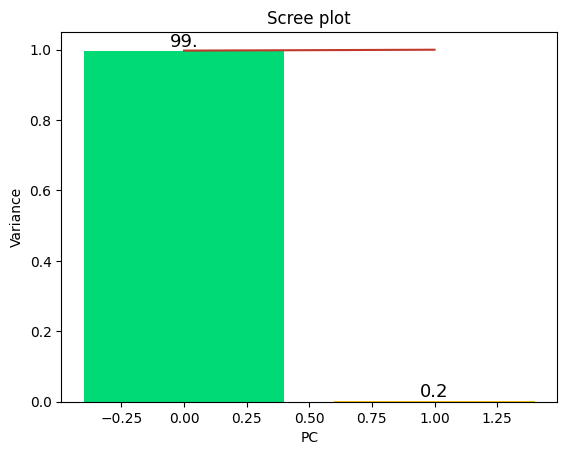

In [65]:
# scree plot으로 나타내는 함수 정의 
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
  
scree_plot(pca)

In [66]:
# bar plot
Nations = ['Na','EU','JP','Other']
sns.barplot(data = extracted_Genre, x = Nations, y = 'PC1')
ax.set_xlabel("Nations")
ax.set_ylabel("PC1")
plt.title('PC1 for Nations by Genre')

KeyError: ignored

###연도별 트렌드 확인해보기


In [68]:
df_Y = df_final.groupby(['Year','Genre']).sum().sort_values('Year', ascending = True)

In [69]:
df_Year = pd.pivot_table(df_Y, index = 'Genre', columns = 'Year', values = 'Total_Sales')

In [70]:
df_Year

Year,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Genre,,,,,,,,,,,,,,,,,,,,,
Action,6.76,3.840,1.720,1.550,2.86,17.792,24.970,37.790,21.050,27.590,...,55.980,98.250,121.470,121.921,106.07,103.47,112.05,117.74,87.58,64.420
Adventure,2.24,12.240,0.070,3.740,0.62,3.180,4.880,8.041,7.160,2.600,...,10.580,22.082,22.521,19.120,15.31,14.92,5.45,6.34,5.55,7.830
Fighting,0.39,12.071,7.670,7.910,10.87,17.230,11.350,28.800,12.240,17.920,...,19.180,16.190,34.100,30.020,12.72,20.76,8.45,6.67,14.69,6.331
Misc,0.08,3.950,0.300,2.770,5.94,9.850,5.230,11.840,19.141,14.470,...,55.431,80.630,77.802,69.880,86.15,51.72,21.28,25.20,23.10,10.430
Platform,7.18,10.800,16.511,25.583,12.82,26.790,20.600,28.750,15.310,15.240,...,40.070,27.070,29.980,36.180,30.36,27.40,16.38,23.02,8.69,5.780
Puzzle,2.52,4.840,3.170,0.900,2.69,2.030,3.431,4.640,1.340,3.830,...,10.790,22.800,14.780,17.840,10.57,4.73,1.29,0.91,1.50,0.690
Racing,1.14,9.050,0.360,2.000,5.55,26.050,29.202,25.610,34.310,14.492,...,31.450,35.880,67.580,32.290,33.13,33.87,13.17,11.04,16.17,7.560
Role-Playing,3.26,6.860,5.590,6.230,11.93,42.541,21.460,27.730,31.049,23.460,...,49.000,38.550,56.810,47.510,50.93,41.25,45.34,26.76,43.54,31.502
Shooter,1.99,0.280,2.360,6.590,3.26,6.000,16.670,8.990,11.780,5.370,...,32.470,61.241,53.670,65.870,75.56,93.80,67.61,60.48,56.63,64.140


Text(0.5, 1.0, '1991-2015 Total Sales for Year by Genre')

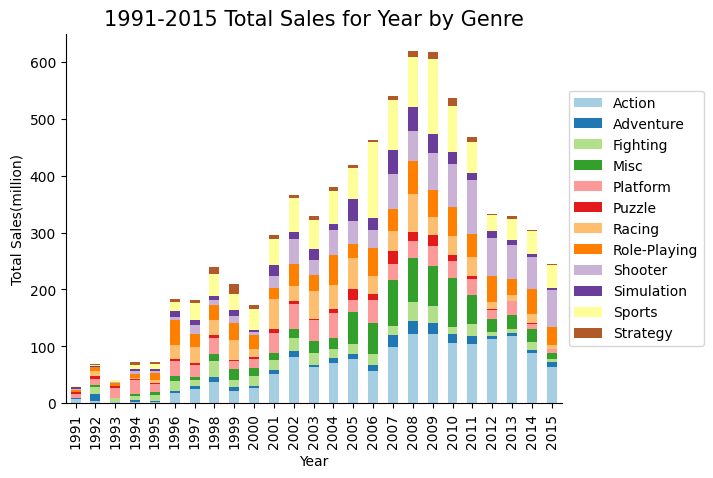

In [71]:
ax = df_Year.T.plot(kind="bar", stacked=True, colormap='Paired')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("Total Sales(million)")
plt.title('1991-2015 Total Sales for Year by Genre', fontsize = '15')

In [72]:
# 장르별 판매량을 비율로 변환 (연도별별)
df_Year_p = df_Year.T.div(df_Year.T.sum(axis=1), axis=0)*100

In [73]:
df_Year_p

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1991,21.955180,7.275089,1.266645,0.259825,23.319259,8.184475,3.702501,10.587853,6.463137,6.982787,6.950309,3.052939
1992,5.629591,17.944320,17.696559,5.790855,15.833223,7.095630,13.267655,10.057029,0.410491,1.422058,4.324816,0.527774
1993,4.201168,0.170978,18.734276,0.732762,40.328766,7.742849,0.879314,13.653794,5.764393,0.464082,6.008647,1.318971
1994,2.164411,5.222515,11.045481,3.868013,35.723961,1.256755,2.792789,8.699538,9.202240,3.672518,11.366651,4.985128
1995,3.951914,0.856709,15.020036,8.207821,17.714523,3.717010,7.668924,16.484731,4.504629,5.762056,10.294321,5.817328
1996,9.698397,1.733414,9.392051,5.369223,14.603195,1.106550,14.199822,23.189046,3.270592,5.881615,8.743384,2.812710
1997,13.791542,2.695343,6.268883,2.888657,11.377884,1.895025,16.128979,11.852883,9.207249,5.075862,15.895898,2.921796
1998,15.779299,3.357537,12.025504,4.943818,12.004626,1.937442,10.693512,11.578723,3.753795,2.367521,16.192675,5.365546
1999,10.071240,3.425657,5.856151,9.157891,7.324973,0.641115,16.415404,14.855199,5.636067,4.794006,13.588280,8.234016


Text(0.5, 1.0, '1991-2015 Total Sales for Year by Genre (%)')

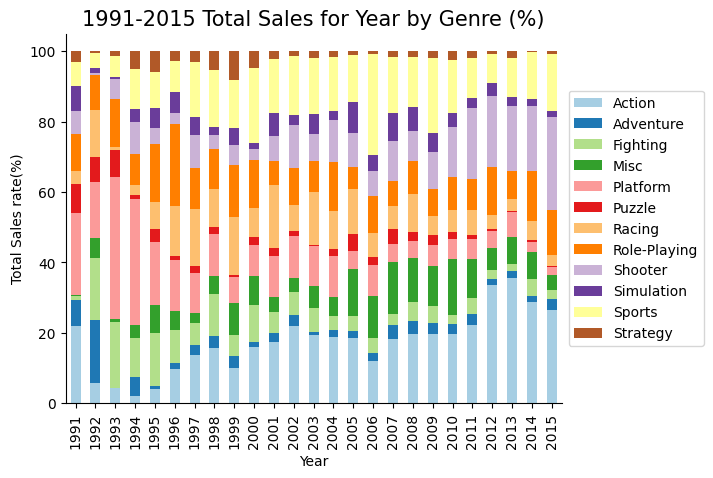

In [74]:
ax = df_Year_p.plot(kind="bar", stacked=True, colormap='Paired')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("Total Sales rate(%)")
plt.title('1991-2015 Total Sales for Year by Genre (%)', fontsize = '15')

### 10년씩 데이터를 뽑아 파이 그래프로 만들어보기

In [147]:
df_final

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Na_Sales/p,EU_Sales/p,JP_Sales/p,Other_Sales/P,P_I
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,0.000114,0.000000,0.000000,0.000000,0.114286
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,0.000486,0.000000,0.000000,0.000002,0.487257
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,0.000000,0.000000,0.000057,0.000000,0.057143
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,0.000114,0.000000,0.000000,0.000000,0.114286
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,0.000343,0.000200,0.000000,0.000006,0.549030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15576,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,0.000429,0.000089,0.000000,0.000002,0.519004
15577,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,0.000029,0.000000,0.000000,0.000000,0.028571
15578,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,0.001257,0.000422,0.000086,0.000020,1.785141
15579,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38,0.000143,0.000111,0.000714,0.000005,0.972884


In [159]:
df_yG = df_final.groupby(['Genre','Year'], as_index=False)['Total_Sales'].sum()#.sort_values('Year', ascending = True)

In [163]:
df_1990s = df_yG.query('Year<2000')
df_2000s = df_yG.query('Year >=2000 & Year< 2010')
df_2010s = df_yG.query('Year<2016')

In [188]:
df_1990s = df_1990s.groupby('Genre', as_index=False)['Total_Sales'].sum().sort_values('Genre', ascending = False)
df_2000s = df_2000s.groupby('Genre', as_index=False)['Total_Sales'].sum().sort_values('Genre', ascending = False)
df_2010s = df_2010s.groupby('Genre', as_index=False)['Total_Sales'].sum().sort_values('Genre', ascending = False)

In [189]:
df_1990s

,Genre,Total_Sales
11,Strategy,50.130
10,Sports,135.141
9,Simulation,45.780
8,Shooter,57.920
7,Role-Playing,156.650
6,Racing,133.272
5,Puzzle,25.561
4,Platform,164.344
3,Misc,59.101
2,Fighting,108.531


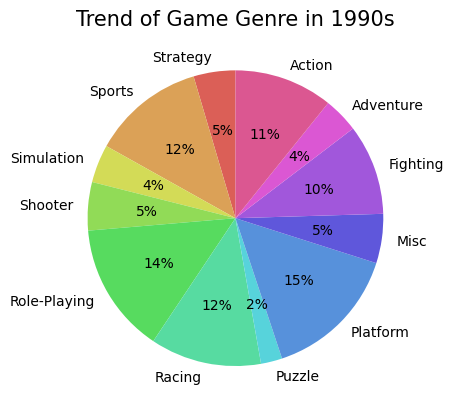

In [205]:
#define data
data = df_1990s.Total_Sales
labels = df_1990s.Genre

#define Seaborn color palette to use
colors = sns.color_palette("hls", 12)

#create pie chart
plt.pie(data, labels = labels, colors = colors,counterclock=True, startangle=90, autopct='%.0f%%')
plt.title('Trend of Game Genre in 1990s', fontsize=15)
plt.show()

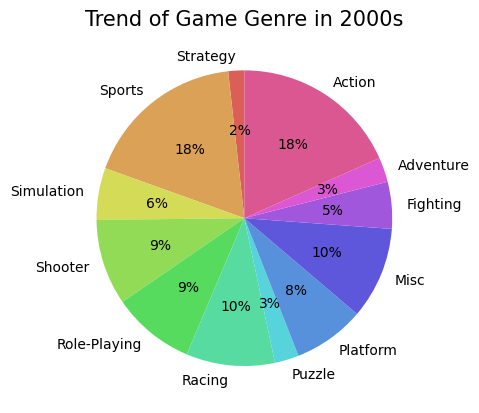

In [208]:
#define data
data = df_2000s.Total_Sales
labels = df_2000s.Genre

#define Seaborn color palette to use
colors = sns.color_palette("hls", 12)

#create pie chart
plt.pie(data, labels = labels, colors = colors,counterclock=True, startangle=90, autopct='%.0f%%')
plt.title('Trend of Game Genre in 2000s', fontsize=15)
plt.show()

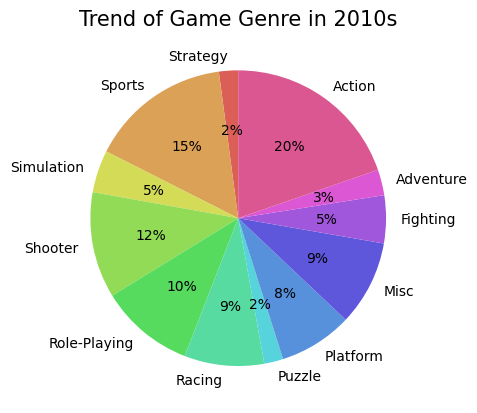

In [209]:
#define data
data = df_2010s.Total_Sales
labels = df_2010s.Genre

#define Seaborn color palette to use
colors = sns.color_palette("hls", 12)

#create pie chart
plt.pie(data, labels = labels, colors = colors,counterclock=True, startangle=90, autopct='%.0f%%')
plt.title('Trend of Game Genre in 2010s', fontsize=15)
plt.show()

In [102]:
df_Year2 = df_Year.reset_index(drop=False)#.set_index('Genre', drop = False)

In [108]:
#df_Year2.set_index('Year', inplace=True)
df_Year2

Year,Genre,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Action,6.76,3.840,1.720,1.550,2.86,17.792,24.970,37.790,21.050,...,55.980,98.250,121.470,121.921,106.07,103.47,112.05,117.74,87.58,64.420
1,Adventure,2.24,12.240,0.070,3.740,0.62,3.180,4.880,8.041,7.160,...,10.580,22.082,22.521,19.120,15.31,14.92,5.45,6.34,5.55,7.830
2,Fighting,0.39,12.071,7.670,7.910,10.87,17.230,11.350,28.800,12.240,...,19.180,16.190,34.100,30.020,12.72,20.76,8.45,6.67,14.69,6.331
3,Misc,0.08,3.950,0.300,2.770,5.94,9.850,5.230,11.840,19.141,...,55.431,80.630,77.802,69.880,86.15,51.72,21.28,25.20,23.10,10.430
4,Platform,7.18,10.800,16.511,25.583,12.82,26.790,20.600,28.750,15.310,...,40.070,27.070,29.980,36.180,30.36,27.40,16.38,23.02,8.69,5.780
5,Puzzle,2.52,4.840,3.170,0.900,2.69,2.030,3.431,4.640,1.340,...,10.790,22.800,14.780,17.840,10.57,4.73,1.29,0.91,1.50,0.690
6,Racing,1.14,9.050,0.360,2.000,5.55,26.050,29.202,25.610,34.310,...,31.450,35.880,67.580,32.290,33.13,33.87,13.17,11.04,16.17,7.560
7,Role-Playing,3.26,6.860,5.590,6.230,11.93,42.541,21.460,27.730,31.049,...,49.000,38.550,56.810,47.510,50.93,41.25,45.34,26.76,43.54,31.502
8,Shooter,1.99,0.280,2.360,6.590,3.26,6.000,16.670,8.990,11.780,...,32.470,61.241,53.670,65.870,75.56,93.80,67.61,60.48,56.63,64.140
9,Simulation,2.15,0.970,0.190,2.630,4.17,10.790,9.190,5.670,10.020,...,21.170,43.180,41.550,32.080,20.82,12.99,12.56,8.50,5.54,4.161


### 제일 인기있는 게임


In [81]:
topg5 = df_final.sort_values('P_I', ascending = False).head(5)
topg10 = df_final.sort_values('P_I', ascending = False).head(10)
topg20 = df_final.sort_values('P_I', ascending = False).head(20)

In [212]:
top_25= df_final.query('Year>=2010').sort_values('P_I', ascending = False).head(10)

In [220]:
top_25[top_25.Name.duplicated(keep  = False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Na_Sales/p,EU_Sales/p,JP_Sales/p,Other_Sales/P,P_I
3275,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39,0.020029,0.020600,0.002771,0.000639,44.038889
10248,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,0.027514,0.011800,0.000171,0.000213,39.698677
5865,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64,0.027629,0.008289,0.000314,0.000174,36.406129
2641,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76,0.025800,0.009511,0.000371,0.000204,35.886243
13260,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.47,0.015829,0.012933,0.001400,0.000250,30.411905
9337,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73,0.017086,0.009867,0.001371,0.000282,28.606217


In [221]:
top_25.loc[[3275], ['Name']] = 'Grand Theft Auto V_PS'
top_25.loc[[10248], ['Name']] = 'Grand Theft Auto V_X'
top_25.loc[[5865], ['Name']] = 'Call of Duty: Black Ops_X'
top_25.loc[[2641], ['Name']] = 'Call of Duty: Modern Warfare 3_X'
top_25.loc[[13260], ['Name']] = 'Call of Duty: Modern Warfare 3_PS'
top_25.loc[[9337], ['Name']] = 'Call of Duty: Black Ops_PS'

In [222]:
top_25()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Na_Sales/p,EU_Sales/p,JP_Sales/p,Other_Sales/P,P_I
4080,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82,0.042771,0.010978,0.000686,0.000258,54.692637
3275,Grand Theft Auto V_PS,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39,0.020029,0.020600,0.002771,0.000639,44.038889
10248,Grand Theft Auto V_X,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,0.027514,0.011800,0.000171,0.000213,39.698677
5865,Call of Duty: Black Ops_X,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64,0.027629,0.008289,0.000314,0.000174,36.406129
2641,Call of Duty: Modern Warfare 3_X,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76,0.025800,0.009511,0.000371,0.000204,35.886243
8528,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24,0.016486,0.012911,0.001000,0.000356,30.753307
13260,Call of Duty: Modern Warfare 3_PS,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.47,0.015829,0.012933,0.001400,0.000250,30.411905
10449,Mario Kart 7,3DS,2011,Racing,Nintendo,4.74,3.91,2.67,0.89,12.21,0.013543,0.008689,0.007629,0.000137,29.997663
3984,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.04,0.014257,0.013067,0.001857,0.000389,29.569841
9337,Call of Duty: Black Ops_PS,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73,0.017086,0.009867,0.001371,0.000282,28.606217


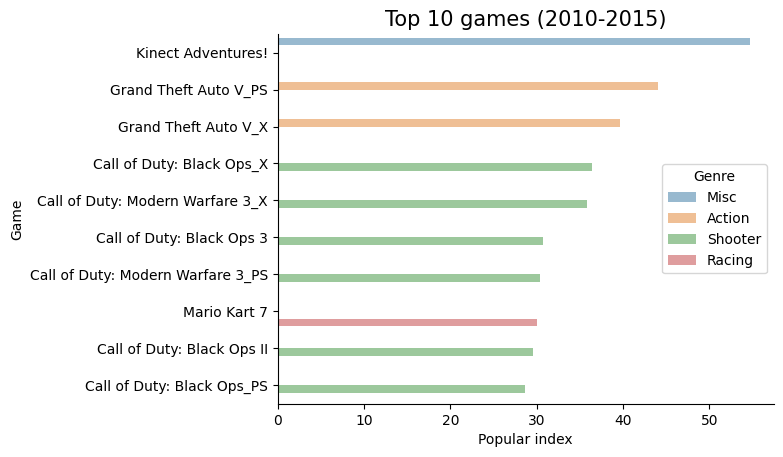

In [223]:
ax = sns.barplot(x="P_I", y="Name", data=top_25, hue = 'Genre', orient ='h', alpha = 0.5)
plt.title('Top 10 games (2010-2015)', fontsize=15)
plt.ylabel('Game', fontsize=10)
plt.xlabel('Popular index', fontsize=10)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

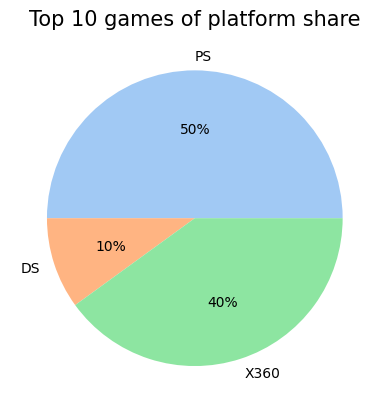

In [225]:
#define data
data = [5/10, 1/10, 4/10]
labels = ['PS', 'DS', 'X360']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 10 games of platform share', fontsize=15)
plt.show()

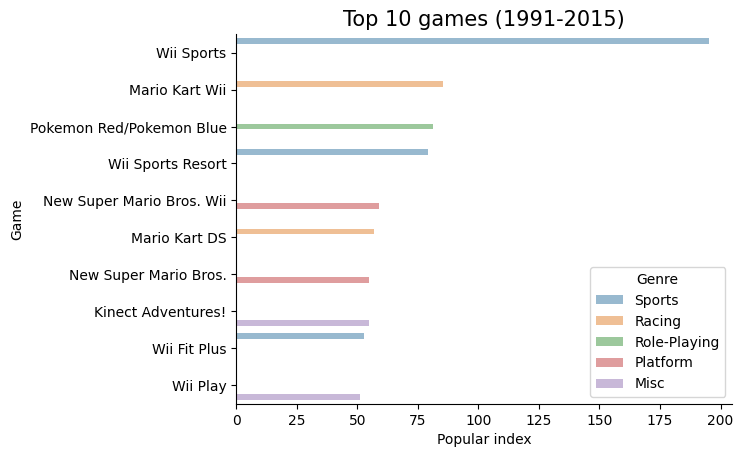

In [86]:
#PI 지수로 봤을 때, 가장 인기있는 게임의 경우

ax = sns.barplot(x="P_I", y="Name", data=topg10, hue = 'Genre', orient ='h', alpha = 0.5)
plt.title('Top 10 games (1991-2015)', fontsize=15)
plt.ylabel('Game', fontsize=10)
plt.xlabel('Popular index', fontsize=10)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

In [114]:
abc = df_final.query('Year>=2010').sort_values('P_I', ascending = False)

In [111]:
df_final.query('Year>=2010').sort_values('P_I', ascending = False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Na_Sales/p,EU_Sales/p,JP_Sales/p,Other_Sales/P,P_I
4080,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82,0.042771,0.010978,0.000686,0.000258,54.692637
3275,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39,0.020029,0.020600,0.002771,0.000639,44.038889
10248,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,0.027514,0.011800,0.000171,0.000213,39.698677
5865,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64,0.027629,0.008289,0.000314,0.000174,36.406129
2641,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76,0.025800,0.009511,0.000371,0.000204,35.886243
8528,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24,0.016486,0.012911,0.001000,0.000356,30.753307
13260,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.47,0.015829,0.012933,0.001400,0.000250,30.411905
10449,Mario Kart 7,3DS,2011,Racing,Nintendo,4.74,3.91,2.67,0.89,12.21,0.013543,0.008689,0.007629,0.000137,29.997663
3984,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.04,0.014257,0.013067,0.001857,0.000389,29.569841
9337,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73,0.017086,0.009867,0.001371,0.000282,28.606217


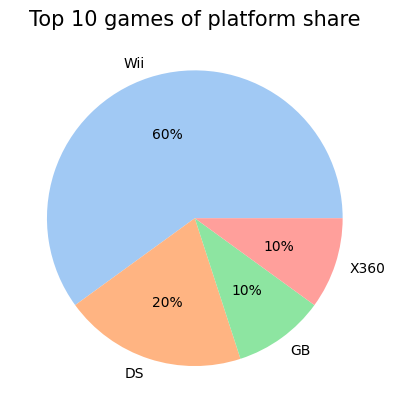

In [224]:
#define data
data = [6/10, 2/10, 1/10, 1/10]
labels = ['Wii', 'DS', 'GB', 'X360']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 10 games of platform share', fontsize=15)
plt.show()

###지역별 출고량 비중 확인인

In [242]:
df_Na = df_final.groupby(['Genre','Year'], as_index=False)['NA_Sales'].sum()#.sort_values('Year', ascending = True)
df_EU = df_final.groupby(['Genre','Year'], as_index=False)['EU_Sales'].sum()#.sort_values('Year', ascending = True)
df_JP = df_final.groupby(['Genre','Year'], as_index=False)['JP_Sales'].sum()#.sort_values('Year', ascending = True)
df_O = df_final.groupby(['Genre','Year'], as_index=False)['Other_Sales'].sum()#.sort_values('Year', ascending = True)

In [243]:
df_Na = df_Na.groupby('Year', as_index=False)['NA_Sales'].sum().sort_values('Year', ascending = False)
df_EU = df_EU.groupby('Year', as_index=False)['EU_Sales'].sum().sort_values('Year', ascending = False)
df_JP = df_JP.groupby('Year', as_index=False)['JP_Sales'].sum().sort_values('Year', ascending = False)
df_O = df_O.groupby('Year', as_index=False)['Other_Sales'].sum().sort_values('Year', ascending = False)

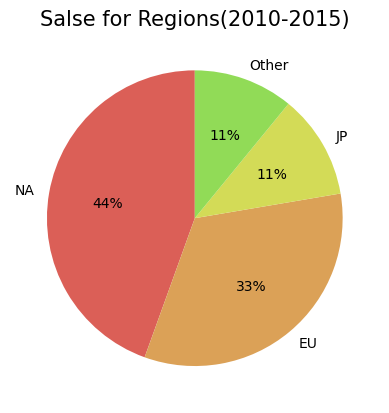

In [253]:
#define data
data = [985.811,735.273, 252.73 ,241.98 ]
labels = ['NA','EU','JP','Other']

#define Seaborn color palette to use
colors = sns.color_palette("hls", 12)

#create pie chart
plt.pie(data, labels = labels, colors = colors,counterclock=True, startangle=90, autopct='%.0f%%')
plt.title('Salse for Regions(2010-2015)', fontsize=15)
plt.show()

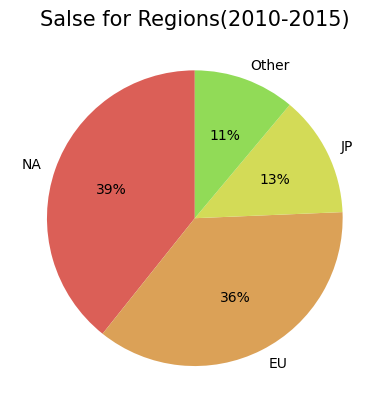

In [258]:
#define data
data = [96.051,88.953, 32.4, 27.13]
labels = ['NA','EU','JP','Other']

#define Seaborn color palette to use
colors = sns.color_palette("hls", 12)

#create pie chart
plt.pie(data, labels = labels, colors = colors,counterclock=True, startangle=90, autopct='%.0f%%')
plt.title('Salse for Regions(2010-2015)', fontsize=15)
plt.show()

In [257]:
df_O

,Year,Other_Sales
24,2015,27.130
23,2014,36.500
22,2013,37.500
21,2012,35.790
20,2011,49.200
19,2010,55.860
18,2009,70.961
17,2008,76.150
16,2007,72.190
15,2006,46.160
